In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=5f1ba8d63359544f36658b7c58940f143651ee2fb2a33d8b223a30092f06a1c7
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, BooleanType, DoubleType, FloatType

conf = SparkConf().setAppName("crime_investigators").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder.config(conf=conf).getOrCreate()

In [ ]:
# Define schema for the Chicago crime dataset
schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case_Number", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary_Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location_Description", StringType(), True),
    StructField("Arrest", StringType(), True),
    StructField("Domestic", StringType(), True),
    StructField("Beat", StringType(), True),
    StructField("District", StringType(), True),
    StructField("Ward", StringType(), True),
    StructField("Community_Area", StringType(), True),
    StructField("FBI_Code", StringType(), True),
    StructField("X_Coordinate", DoubleType(), True),
    StructField("Y_Coordinate", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated_On", StringType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])

# Load the Chicago crime data
chicago_crime = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "false") \
    .schema(schema) \
    .load("/content/Crimes_-_2001_to_Present.csv")

# Print the schema
chicago_crime.printSchema()


root
 |-- ID: integer (nullable = true)
 |-- Case_Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary_Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location_Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community_Area: string (nullable = true)
 |-- FBI_Code: string (nullable = true)
 |-- X_Coordinate: double (nullable = true)
 |-- Y_Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated_On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
from pyspark.sql.functions import to_timestamp
import datetime

In [ ]:
# Drop all rows with null values
chicago_crime = chicago_crime.dropna()

# Verify the number of rows after dropping null values
print("Number of rows after dropping null values: ", chicago_crime.count())

Number of rows after dropping null values:  69281


In [ ]:
# Change data type of 'Date' column to TimestampType
chicago_crime = chicago_crime.withColumn('Date', to_timestamp('Date', 'MM/dd/yyyy hh:mm:ss a'))

# Verify the updated schema and data types
#chicago_crime.printSchema()

# Show the first few rows of the dataframe with updated 'Date' column
chicago_crime.show(5)


+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case_Number|               Date|              Block|IUCR|Primary_Type|         Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|          Updated_On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|    043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  

In [ ]:
from pyspark.sql.functions import year, current_date

# Filter the data for the last ten years (2013 to 2023)
chicago_crime = chicago_crime.filter((year('Date') >= 2013) & (year('Date') <= year(current_date())))

# Verify the updated schema and data types
#chicago_crime.printSchema()

# Show the first few rows of the dataframe with updated 'Date' column
chicago_crime.show(5)


+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case_Number|               Date|              Block|IUCR|Primary_Type|         Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|          Updated_On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|    043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  

In [ ]:
from pyspark.sql.functions import col

# Define a list of crime types to remove
crime_types_to_remove = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON - CRIMINAL', 'ARSON']

# Filter the dataframe to remove records with the specified crime types
chicago_crime = chicago_crime.filter(~col('Primary_Type').isin(crime_types_to_remove))

# Verify the updated schema and data types
chicago_crime.printSchema()

# Show the first few rows of the dataframe with updated 'Date' column
chicago_crime.show(5)


root
 |-- ID: integer (nullable = true)
 |-- Case_Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary_Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location_Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community_Area: string (nullable = true)
 |-- FBI_Code: string (nullable = true)
 |-- X_Coordinate: double (nullable = true)
 |-- Y_Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated_On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

+--------+-----------+-------------------+-------------------+----+------------+--------------------+

In [ ]:
# Define a dictionary to map similar crime types
crime_type_mapping = {
    'SEX OFFENSE': 'SEX CRIME',
    'PROSTITUTION': 'SEX CRIME',
    # Add more mappings as needed
}

# Use the mapping dictionary to update the 'Primary_Type' column
chicago_crime = chicago_crime.replace(to_replace=crime_type_mapping, subset=['Primary_Type'])

# Verify the updated schema and data types
chicago_crime.printSchema()

# Show the first few rows of the dataframe with updated 'Primary_Type' column
chicago_crime.show(5)


root
 |-- ID: integer (nullable = true)
 |-- Case_Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary_Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location_Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community_Area: string (nullable = true)
 |-- FBI_Code: string (nullable = true)
 |-- X_Coordinate: double (nullable = true)
 |-- Y_Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated_On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

+--------+-----------+-------------------+-------------------+----+------------+--------------------+

In [ ]:
from pyspark.sql.functions import year

# Group the data by year and count the number of crimes
yearly_crime_count = chicago_crime.groupBy(year('Date').alias('Year')).count()

# Sort the data by year in ascending order
yearly_crime_count = yearly_crime_count.orderBy('Year')

# Show the yearly crime count for the last ten years
yearly_crime_count.show(10)


+----+-----+
|Year|count|
+----+-----+
|2013|  104|
|2014|  219|
|2015|63415|
|2017|    7|
|2018|    3|
|2019|  480|
|2020|   81|
|2021|    3|
|2022|   98|
+----+-----+



In [ ]:
from pyspark.sql.functions import hour

# Group the data by hour and count the number of crimes
hourly_crime_count = chicago_crime.groupBy(hour('Date').alias('Hour')).count()

# Sort the data by count in descending order
hourly_crime_count = hourly_crime_count.orderBy('count', ascending=False)

# Show the hourly crime count for the highest hour
hourly_crime_count.show(5)


+----+-----+
|Hour|count|
+----+-----+
|  18| 3785|
|  19| 3765|
|  12| 3669|
|  20| 3569|
|  15| 3531|
+----+-----+
only showing top 5 rows



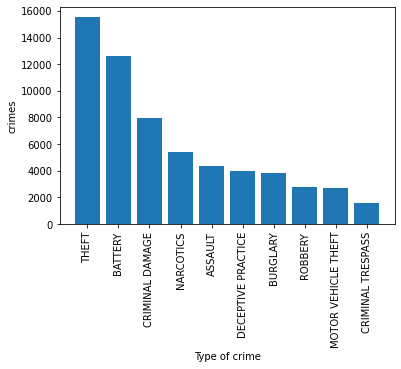

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by crime type and count the number of crimes
crime_count = chicago_crime.groupBy('Primary_Type').count()

# Sort the data by count in descending order and select the top ten crimes
top_ten = crime_count.orderBy('count', ascending=False).limit(10)

# Convert the top ten crimes to a Pandas dataframe
top_ten = top_ten.toPandas()

# Create a bar chart of the top ten crimes
plt.bar(top_ten['Primary_Type'], top_ten['count'])
plt.xticks(rotation=90)
plt.xlabel('Type of crime')
plt.ylabel('crimes')
plt.show()
